In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_28400/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Listado_Recursos_Generacion.csv' , header=3)

In [3]:
df

,Código SIC,Nombre Recurso,Capacidad Efectiva Neta [MW],Factor de Conversión,Es Menor,Tipo Despacho,Combustible por Defecto,Fecha Operación,Municipio,Departamento,Agente Representante,Estado Recurso,Tipo Generación,Clasificación
0,3JNR,AUTOG UNIBOL 1,5,7.500,SI,ND,GAS,02/11/24,BARRANQUILLA,ATLÁNTICO,ENERCO S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
1,TCBE,TERMOCARIBE III 1,42,8.703,NO,DC,GAS,11/24/22,SANTA ROSADE LIMA,BOLÍVAR,TERMO CARIBE S.A.S. E.S.P.,PRUEBAS,TERMICA,NORMAL
2,3C3X,AUTOG INGENIO MARIA LUISA,2,0.000,NO,ND,BAGAZO,08/14/21,FLORIDA,VALLE DEL CAUCA,DEPI ENERGY S.A.S. E.S.P.,OPERACIÓN,TERMICA,AUTOGENERADOR
3,3AXV,AGPE INGENIO DE OCCIDENTE,1,0.000,NO,ND,BAGAZO,03/04/21,VILLA RICA,CAUCA,EMPRESA MUNICIPAL DE ENERGIA ELECTRICA S.A. E....,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
4,3AL6,AGPE ENTREPALMAS,1,0.000,NO,ND,BIOGAS,12/31/20,SAN MARTIN,META,CELSIA COLOMBIA S.A. E.S.P.,OPERACIÓN,TERMICA,AUTOG PEQ. ESCALA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,CAS1,CENTRAL CASTILLA 1,3,0.000,NO,ND,BAGAZO,08/15/04,PRADERA,VALLE DEL CAUCA,RIOPAILA ENERGÍA S.A.S. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR
365,IRG1,INGENIO RISARALDA 1,20,0.000,NO,ND,BAGAZO,08/15/03,BALBOA,RISARALDA,EMPRESA DE ENERGIA DE PEREIRA S.A. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR
366,PNC1,COGENERADOR PROENCA 1,4,0.000,NO,ND,CARBON,01/01/99,CALOTO,CAUCA,PROYECTOS ENERGETICOS DEL CAUCA S.A. E.S.P.,INACTIVO,COGENERADOR,COGENERADOR
367,INC1,INCAUCA 1,60,0.000,NO,ND,BAGAZO,10/21/98,MIRANDA,CAUCA,NITRO ENERGY COLOMBIA S.A.S. E.S.P.,OPERACIÓN,COGENERADOR,COGENERADOR


In [4]:
#Convertir el Campo fecha Operacion en Tipo Fecha
df['Fecha Operación'] = pd.to_datetime(df['Fecha Operación'])

/tmp/ipykernel_28400/3446684232.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha Operación'] = pd.to_datetime(df['Fecha Operación'])


In [5]:
#Sacar el Mes de la fecha 
df['Mes'] = df['Fecha Operación'].dt.month

In [6]:
#Promedio mensual por tipo de generacion
promedio = df.groupby(['Mes', 'Tipo Generación'])['Capacidad Efectiva Neta [MW]'].mean()

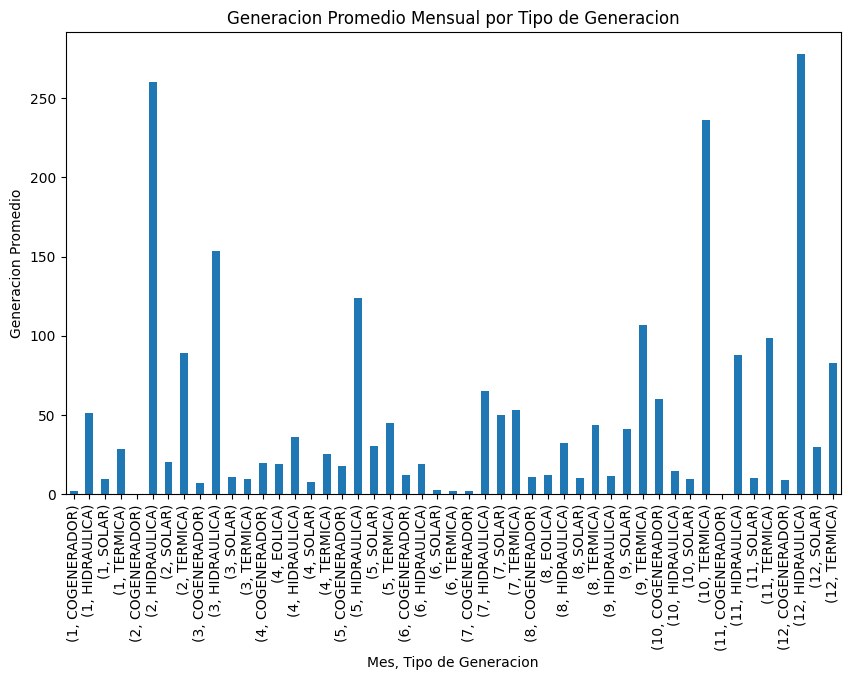

In [7]:
#Graficamos y Guardamos en png
promedio.plot(kind='bar', figsize=(10,6), xlabel='Mes, Tipo de Generacion', ylabel='Generacion Promedio', 
              title='Generacion Promedio Mensual por Tipo de Generacion')
plt.savefig("pregunta3_grafico1.png", bbox_inches='tight')

In [8]:
promedio2 = df.groupby(['Mes'])['Capacidad Efectiva Neta [MW]'].mean()

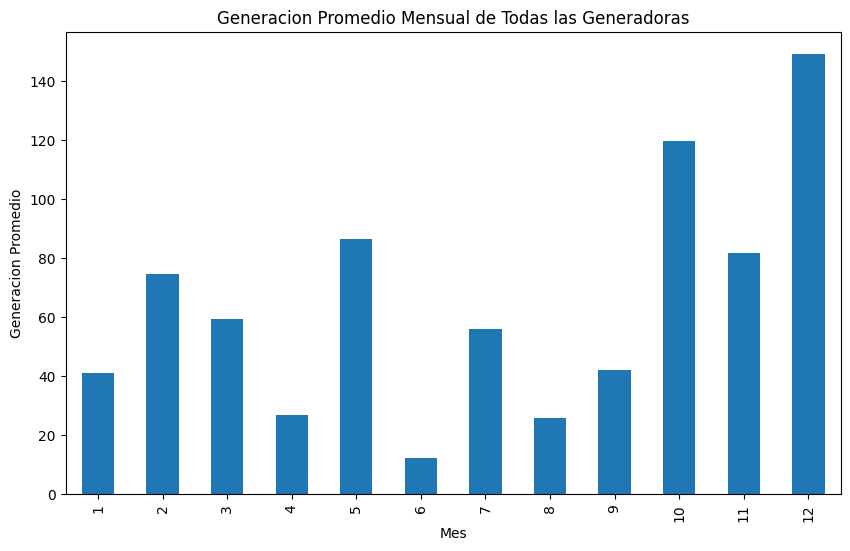

In [9]:
#Segunda grafica
promedio2.plot(kind='bar', figsize=(10,6), xlabel='Mes', ylabel='Generacion Promedio', 
              title='Generacion Promedio Mensual de Todas las Generadoras')
plt.savefig("pregunta3_grafico2.png", bbox_inches='tight')